Total number of elements after dropping missing values: 2331


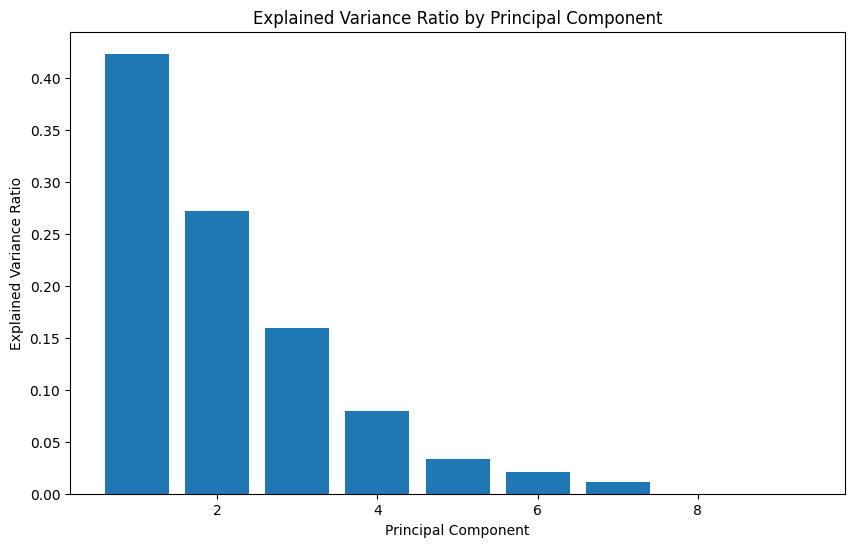

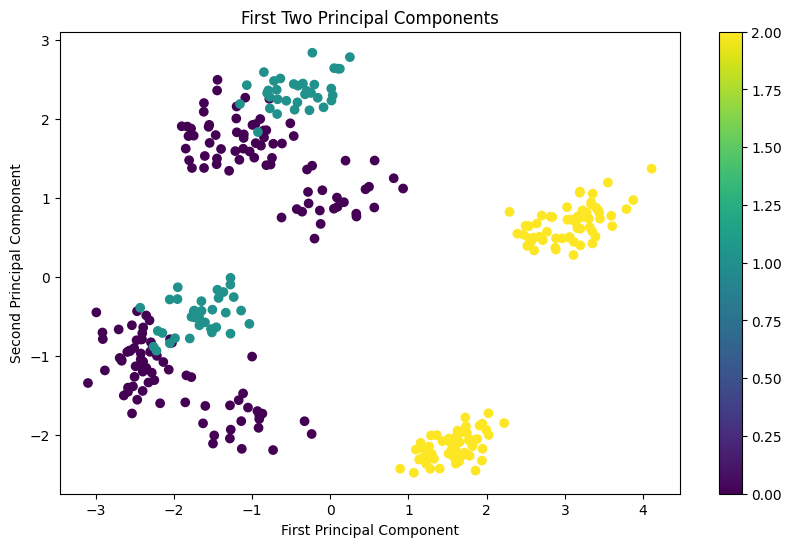

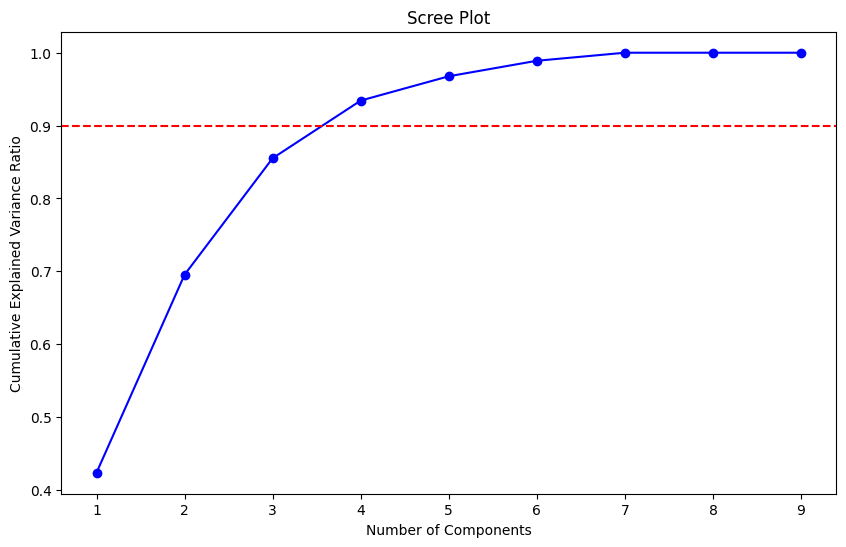

Number of components that explain at least 90% of the variance: 4


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Clean the dataset by removing rows with missing values
penguins_clean = penguins.dropna()

# Print the total number of elements in the cleaned DataFrame
print(f"Total number of elements after dropping missing values: {penguins_clean.size}")

# Separate features and target
X = penguins_clean.drop("species", axis=1)
y = penguins_clean["species"]

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, columns=["island", "sex"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Bar graph of explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Component")
plt.show()

# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("First Two Principal Components")
plt.colorbar(scatter)
plt.show()

# Scree plot
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Scree Plot")
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

# Determine the number of components that explain at least 90% of the variance
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print(f"Number of components that explain at least 90% of the variance: {n_components_90}")